In [1]:
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [2]:
df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding='latin-1')
df.describe()

,0,1467810369
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [3]:
df.columns = ['target','id','date','flag','user','text']
df.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
df= df.drop(['id','date','flag','user'],axis = 1)
df.head()

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [5]:
df['target'].unique()

array([0, 4])

In [6]:
dict = {0 :  "Negative",
       4 : "Positive"}

df['target'] = df['target'].map(dict)
df.head()

,target,text
0,Negative,is upset that he can't update his Facebook by ...
1,Negative,@Kenichan I dived many times for the ball. Man...
2,Negative,my whole body feels itchy and like its on fire
3,Negative,"@nationwideclass no, it's not behaving at all...."
4,Negative,@Kwesidei not the whole crew


In [7]:
df['target'].unique()

array(['Negative', 'Positive'], dtype=object)

In [8]:
text = list(df['text'])
sentiment = list(df['target'])

**I. DATA CLEANING (CLEANING THE TEXT) :**

In [9]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [10]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [11]:
def preprocess(text):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for word in text:
        word = word.lower()
        
        # Replace all URls with 'URL'
        word = re.sub(urlPattern,' URL',word)
        # Replace all emojis.
        for emoji in emojis.keys():
            word = word.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        word = re.sub(userPattern,' USER', word)        
        # Replace all non alphabets.
        word = re.sub(alphaPattern, " ", word)
        # Replace 3 or more consecutive letters by 2 letter.
        word = re.sub(sequencePattern, seqReplacePattern, word)

        tweetwords = ''
        for w in word.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(w)>1:
                # Lemmatizing the word.
                w = wordLemm.lemmatize(w)
                tweetwords += (w+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [12]:
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')

Text Preprocessing complete.


In [13]:
processedtext

['is upset that he can update his facebook by texting it and might cry a result school today also blah ',
 'USER dived many time for the ball managed to save 50 the rest go out of bound ',
 'my whole body feel itchy and like it on fire ',
 'USER no it not behaving at all mad why am here because can see you all over there ',
 'USER not the whole crew ',
 'need hug ',
 'USER hey long time no see yes rain bit only bit lol fine thanks how you ',
 'USER nope they didn have it ',
 'USER que me muera ',
 'spring break in plain city it snowing ',
 'just re pierced my ear ',
 'USER couldn bear to watch it and thought the ua loss wa embarrassing ',
 'USER it it count idk why did either you never talk to me anymore ',
 'USER would ve been the first but didn have gun not really though zac snyder just doucheclown ',
 'USER wish got to watch it with you miss you and USER how wa the premiere ',
 'hollis death scene will hurt me severely to watch on film wry is director cut not out now ',
 'about to f

In [14]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

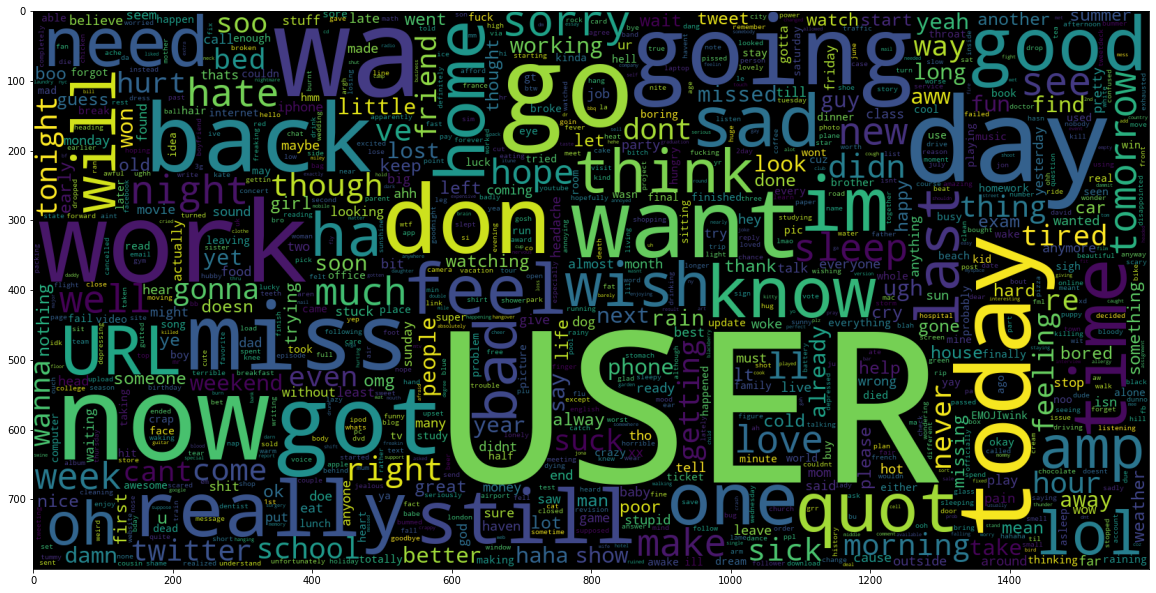

In [15]:
#Creating a Wordcloud Map of all the frequently occuring words in the NEGATIVE tweets
data_neg = processedtext[:800000]     #First 800000 are negative comments
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

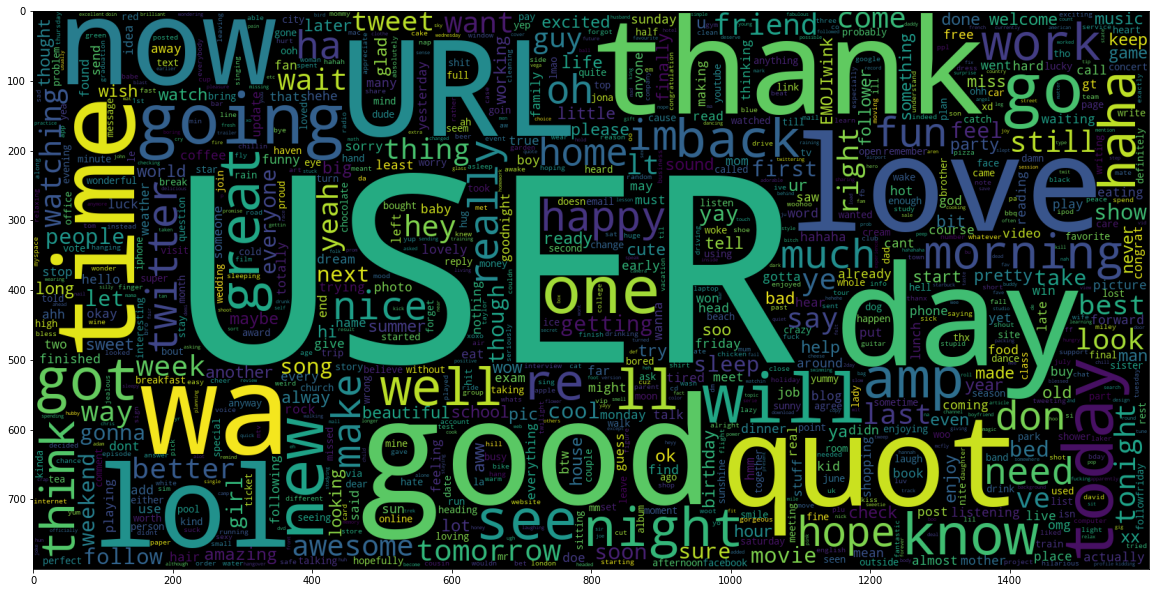

In [16]:
#Creating a Wordcloud Map of all the frequently occuring words in the POSITIVE tweets
data_pos = processedtext[800000:]      #Last 800000 are negative comments
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [17]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(processedtext, sentiment, test_size = 0.05, random_state = 0)

**CLASSIFICATION**

In [18]:
# #1. Vectorization (text to numbers)

from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


In [19]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [21]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

              precision    recall  f1-score   support

    Negative       0.81      0.79      0.80     39986
    Positive       0.80      0.81      0.80     40014

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000

[[31773  8213]
 [ 7554 32460]]


In [22]:
import pickle
file = open('Sentiment-BNB.pickle','wb')
pickle.dump(BNBmodel, file)
file.close()

In [23]:
def load_models():
    # Load the vectoriser.
    file = open('..path/vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('..path/Sentiment-BNB.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

In [24]:
def predict(vectoriser, model, text):
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
    
    text = ['I hope you had a good day', 
              'My day didnt go very well :(', 
              'I dont think that RCB should lost #dissapointed.', 
              'Yayay we won!',
              'Had a very tasty lunch at PizzaExpress #satisfied']
    
    df = predict(vectoriser, BNBmodel, text)
    print(df.head())

                                                text sentiment
0                          I hope you had a good day  Positive
1                       My day didnt go very well :(  Negative
2   I dont think that RCB should lost #dissapointed.  Negative
3                                      Yayay we won!  Positive
4  Had a very tasty lunch at PizzaExpress #satisfied  Positive


In [25]:
text = ['I hoped that GE would win today but still I am very happy by their performance! #GEFighting']
    
df = predict(vectoriser, BNBmodel, text)
print(df.head())

                                                text sentiment
0  I hoped that GE would win today but still I am...  Negative
